In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os

PROJECT_DIR = "/content/drive/MyDrive/work/multi-view-mammo-classifier"
os.chdir(PROJECT_DIR)

print(f"Current working directory: {os.getcwd()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/MyDrive/work/multi-view-mammo-classifier


In [2]:
!ls

config.py  dataset    __pycache__  src
data	   notebooks  scripts	   study_status.csv


In [3]:
# Load environment & config
from config import *

print(f"[Config] Dataset dir: {DATASET_DIR}")
print(f"[Config] Project root: {PROJECT_ROOT}")

[Config] Detected environment: colab
[Config] Loaded .env.colab
[Config] Dataset dir: /content/drive/MyDrive/work/multi-view-mammo-classifier/dataset
[Config] Source dir: /content/drive/MyDrive/work/multi-view-mammo-classifier


In [4]:
# Extract dataset (first_1000.tar.gz)
import tarfile

tar_path = os.path.join(DATA_DIR, "first_1000.tar.gz")
extract_path = FIRST_1000_DIR

if not os.path.exists(extract_path):
    print(f"Extracting {tar_path} ...")
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(PROJECT_DIR)
    print("Extraction completed.")
else:
    print(f"Dataset already extracted at {extract_path}")

Dataset already extracted at /content/drive/MyDrive/work/multi-view-mammo-classifier/data/first_1000


In [5]:
!apt-get install -y tree

print(f"\nDisplaying structure:")
!tree -L 2 /content/drive/MyDrive/work/multi-view-mammo-classifier/data/first_1000 | head -n 20

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

Displaying structure:
/content/drive/MyDrive/work/multi-view-mammo-classifier/data/first_1000
├── test
│   ├── 0025a5dc99fd5c742026f0b2b030d3e9_L_CC.png
│   ├── 0025a5dc99fd5c742026f0b2b030d3e9_L_MLO.png
│   ├── 0025a5dc99fd5c742026f0b2b030d3e9_R_CC.png
│   ├── 0025a5dc99fd5c742026f0b2b030d3e9_R_MLO.png
│   ├── 00568c6b2c47f99e0156c9bca84c3963_L_CC.png
│   ├── 00568c6b2c47f99e0156c9bca84c3963_L_MLO.png
│   ├── 00568c6b2c47f99e0156c9bca84c3963_R_CC.png
│   ├── 00568c6b2c47f99e0156c9bca84c3963_R_MLO.png
│   ├── 00dfcde5aaf6cd0aab3c3a0435632b3f_L_CC.png
│   ├── 00dfcde5aaf6cd0aab3c3a0435632b3f_L_MLO.png
│   ├── 00dfcde5aaf6cd0aab3c3a0435632b3f_R_CC.png
│   ├── 00dfcde5aaf6cd0aab3c3a0435632b3f_R_MLO.png
│   ├── 00f826160094668f09b06ec671efe0ab_L_CC.png
│   ├── 00f826160094668f09b06ec67

In [6]:
# Basic dataset statistics
import glob
import pandas as pd

train_images = glob.glob(os.path.join(FIRST_1000_DIR, "training", "*.png"))
test_images  = glob.glob(os.path.join(FIRST_1000_DIR, "test", "*.png"))

print(f"Training images: {len(train_images)}")
print(f"Testing images:  {len(test_images)}")

# Load label
label_df = pd.read_csv(LABEL_PATH)
print(f"Label file: {LABEL_PATH}")
print(f"Label shape: {label_df.shape}")

# Show label distribution
if "breast_density" in label_df.columns:
    print("\n[Breast density distribution]")
    print(label_df["breast_density"].value_counts())
if "breast_birads" in label_df.columns:
    print("\n[BI-RADS distribution]")
    print(label_df["breast_birads"].value_counts())

Training images: 3200
Testing images:  800
Label file: /content/drive/MyDrive/work/multi-view-mammo-classifier/dataset/breast-level_annotations.csv
Label shape: (20000, 10)

[Breast density distribution]
breast_density
DENSITY C    15292
DENSITY D     2700
DENSITY B     1908
DENSITY A      100
Name: count, dtype: int64

[BI-RADS distribution]
breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 3      930
BI-RADS 4      762
BI-RADS 5      226
Name: count, dtype: int64


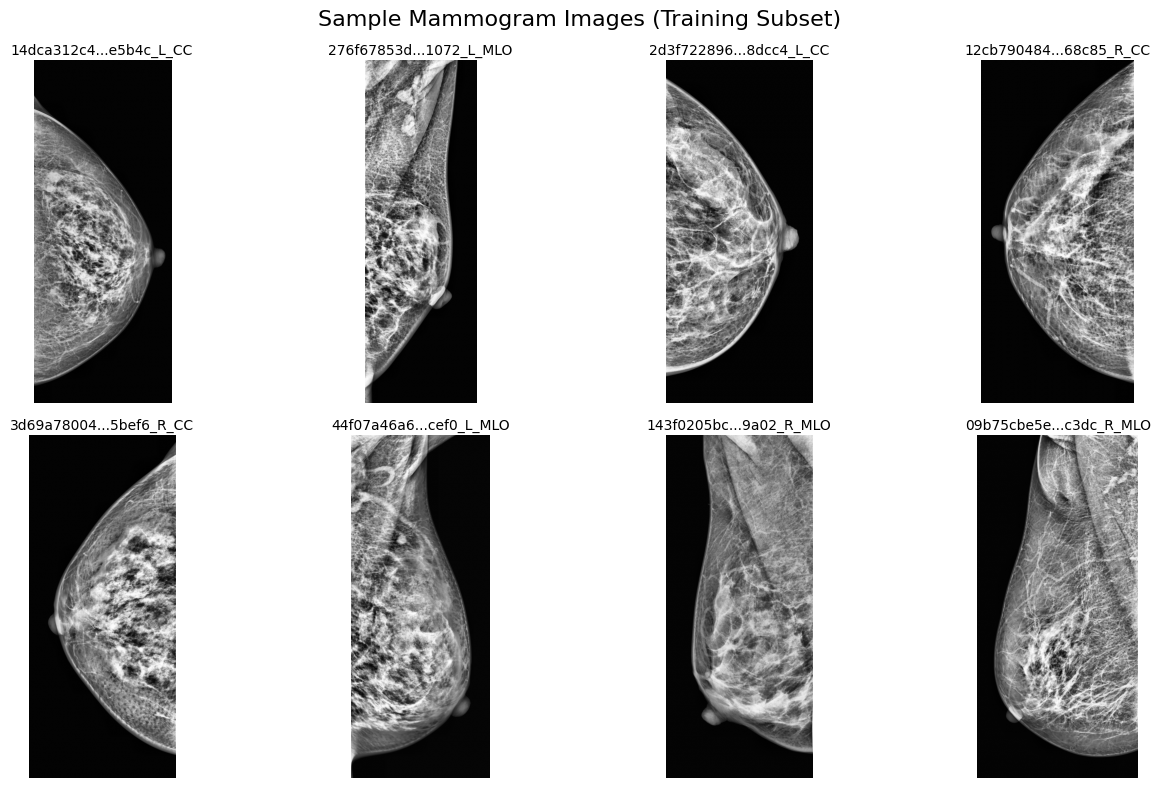

In [7]:
# Visualize sample images
import matplotlib.pyplot as plt
import cv2
import random

sample_imgs = random.sample(train_images, 8)
plt.figure(figsize=(14, 8))

for i, path in enumerate(sample_imgs):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    fname = os.path.basename(path)
    fname_noext = os.path.splitext(fname)[0]
    if len(fname_noext) > 22:
        short_name = f"{fname_noext[:10]}...{fname_noext[-10:]}"
    else:
        short_name = fname_noext

    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(short_name, fontsize=10, pad=4)

plt.suptitle("Sample Mammogram Images (Training Subset)", fontsize=16)
plt.tight_layout()
plt.show()